# Task 2

## Part 1

1. Read the dataset and store the values in the variables.

In [51]:
import pandas as pd
import numpy as np
from MachineLearningModel import RegressionModelNormalEquation

data = pd.read_csv('datasets/housing-boston.csv')

# Extract features and target
# First two columns as features and last column as the target
Xe = data.iloc[:, [0, 1]].values
y = data.iloc[:, -1].values

# Initialize the regression model with degree 1
model = RegressionModelNormalEquation(degree=1)

# Fit the model
model.fit(Xe, y)
# to predict:
predictions = model.predict(Xe)
# To evaluate:
mse = model.evaluate(Xe, y)
print("MSE:", mse)

MSE: 39.14548321146509


2. Plot the dataset. You must plot two figures side by side (e g., use the subplot method), with the predicted value as the $y-axis$ and each variable on the $x-axis$. 

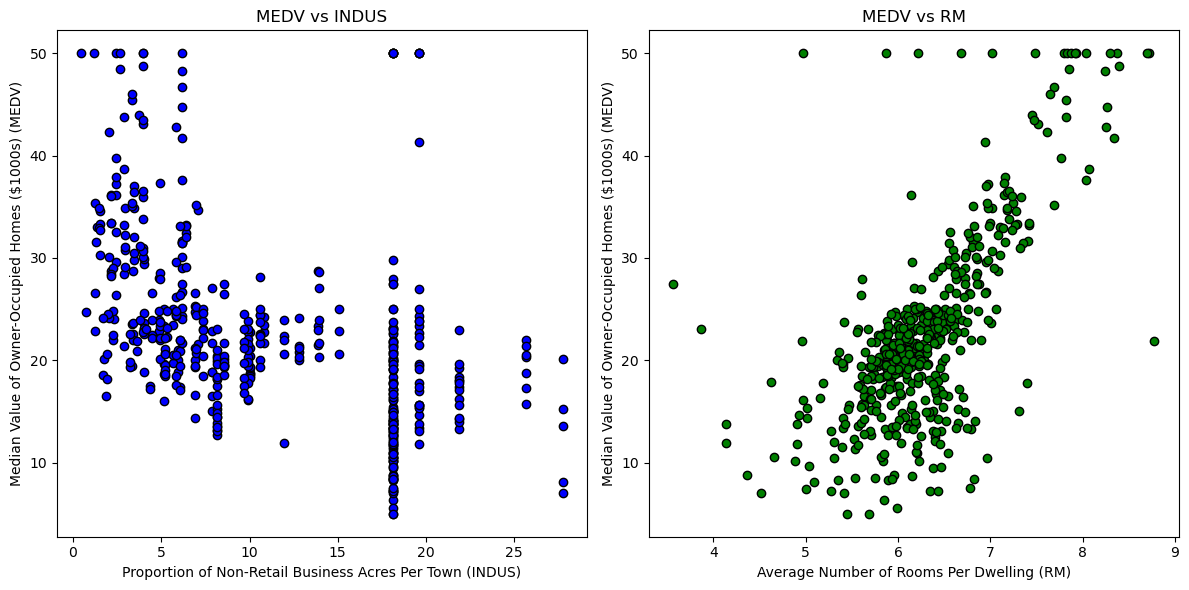

In [43]:
import matplotlib.pyplot as plt

data = pd.read_csv('datasets/housing-boston.csv')

INDUS = data['INDUS']
RM = data['RM']
MEDV = data['PRICE']

# Create the figure and a set of subplots with 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  

# Plotting
axs[0].scatter(INDUS, MEDV, color='blue', edgecolor='k')
axs[0].set_title('MEDV vs INDUS')
axs[0].set_xlabel('Proportion of Non-Retail Business Acres Per Town (INDUS)')
axs[0].set_ylabel('Median Value of Owner-Occupied Homes ($1000s) (MEDV)')

axs[1].scatter(RM, MEDV, color='green', edgecolor='k')
axs[1].set_title('MEDV vs RM')
axs[1].set_xlabel('Average Number of Rooms Per Dwelling (RM)')
axs[1].set_ylabel('Median Value of Owner-Occupied Homes ($1000s) (MEDV)')

plt.tight_layout()
plt.show()

3. Use your implementation of the regression model with the normal equation (RegressionModelNormalEquation) and report:

* The values for $\beta$. 

* The cost.

* The predicted value for an instance with values for INDUS and TAX equals to $,$, respectively.


In [52]:
Xe = data[['INDUS', 'RM']].values  
y = data['PRICE'].values

model = RegressionModelNormalEquation(degree=1)

model.fit(Xe, y)

print("Coefficients (β):", model.theta)
print("Cost (MSE):", model.cost)

new_instance = np.array([[2.31, 6.575]])  
predicted_value = model.predict(new_instance)
print("Predicted value for INDUS=2.31 and RM=6.575:", predicted_value)


Coefficients (β): [-22.89831573  -0.33471389   7.82205511]
Cost (MSE): [39.14548321146509]
Predicted value for INDUS=2.31 and RM=6.575: [27.75850755]


4. Now, normalize the input features, run the regression model with the normal equation, and report the same items. 
The predicted values for this experiment should be the same, but the $\beta$ values change. Why?

Why do the coefficients (β) change?  
The scale and distribution of your data change when you normalize features by setting their average to 0 and the standard deviation to 1. Since the scale of the features is different, the coefficients of the model are adjusted according to this new scale. But this does not mean that the relationship between the features and the target value has changed. Instead, the model only adjusts the coefficients to reflect the same relationship at a different scale.  

Why do the predictions stay the same?  
The way the model calculates predictions remains consistent based on the scale of the input data. Even if the coefficients change. Since both the features used for training and the new instances used for predictions are scaled in the same way, the output of the model, i.e. the predictions, remains consistent. Essentially the model still figures out how to relate features to output, it just uses different scaled coefficients to do so.  

The general behavior of the model and its effectiveness in predicting the results do not change while the numbers representing the coefficients change due to normalization.  

In [53]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
Xe_normalized = scaler.fit_transform(Xe)

model_normalized = RegressionModelNormalEquation(degree=1)
model_normalized.fit(Xe_normalized, y)

print("Normalized Coefficients (β):", model_normalized.theta)
print("Normalized Cost (MSE):", model_normalized.cost)

new_instance_normalized = scaler.transform(np.array([[2.31, 6.575]]))  
predicted_value_normalized = model_normalized.predict(new_instance_normalized)
print("Predicted value for normalized INDUS=2.31 and RM=6.575:", predicted_value_normalized)


Normalized Coefficients (β): [22.53280632 -2.29398525  5.49047659]
Normalized Cost (MSE): [39.1454832114651]
Predicted value for normalized INDUS=2.31 and RM=6.575: [27.75850755]


5. Now, you will work with your implementation of the gradient descent for any degree polynomial. In this part, you must compare how the cost function evolves by using your model using a non-normalized and a normalized instance of your RegressionModelGradientDescen class. 
    * You must plot two figures (e.g., use subplots) side by side to show how the cost evolves over 3000 iterations with a learning rate of $0.001$ using and not using feature normalization. 
    * Describe what is happening and why this happens (i.e., using or not normalization).        
    

In order for the gradient descent algorithm to work more efficiently, it is necessary to normalize the features to have a similar scale. The reason for this is that all features must contribute equally to the cost calculation. If any feature completely dominates the optimization process, this will cause misleading results.  
When data is not normalized, the cost may decrease unevenly and more slowly. Therefore, when features vary greatly in scale, the algorithm has difficulty finding the optimal path to the least cost.  
However, when the data is normalized, the cost decreases more smoothly and quickly. This is because the algorithm can easily adapt to even the smallest changes in every aspect of the feature space. Thus, it offers a more direct path to minimum cost. This distinction can be observed concretely by comparing two different images provided by the code.

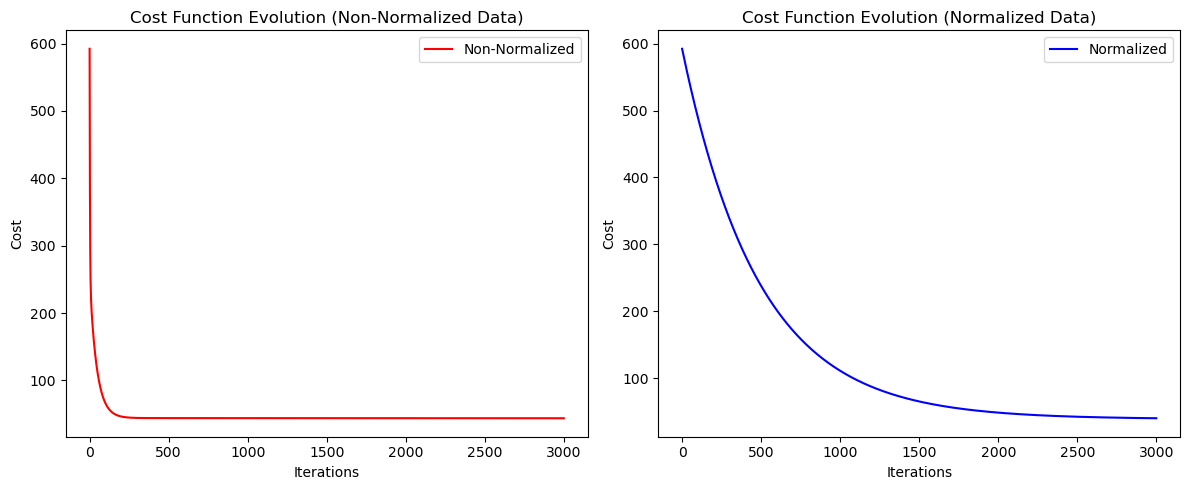

In [54]:
from MachineLearningModel import RegressionModelGradientDescent

X = data[['INDUS', 'RM']].values
y = data['PRICE'].values

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Initialize models
model_non_normalized = RegressionModelGradientDescent(degree=1, learning_rate=0.001, num_iterations=3000)
model_normalized = RegressionModelGradientDescent(degree=1, learning_rate=0.001, num_iterations=3000)

# Fit models
model_non_normalized.fit(X, y)
model_normalized.fit(X_normalized, y)

# Extract cost history for plotting
cost_history_non_normalized = model_non_normalized.cost
cost_history_normalized = model_normalized.cost


plt.figure(figsize=(12, 5))

# Non-normalized Data
plt.subplot(1, 2, 1)
plt.plot(cost_history_non_normalized, label='Non-Normalized', color='red')
plt.title('Cost Function Evolution (Non-Normalized Data)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()

# Normalized Data
plt.subplot(1, 2, 2)
plt.plot(cost_history_normalized, label='Normalized', color='blue')
plt.title('Cost Function Evolution (Normalized Data)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()

plt.tight_layout()
plt.show()

6. Finally, find and plot a figure with the hyperparameter's learning rate and the number of iterations (using the normalized version) such that you get within a difference of 1\% of the final cost for the normal equation using this dataset.


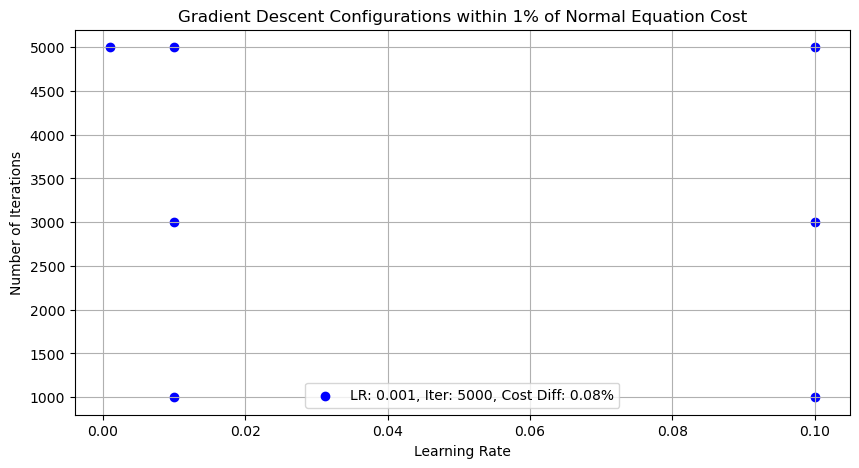

In [55]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Fit model using normal equation
model_ne = RegressionModelNormalEquation(degree=1)
model_ne.fit(X_normalized, y)
ne_cost = model_ne.cost[0]  # Convert list to scalar

# Parameters for gradient descent
learning_rates = [0.001, 0.01, 0.1]
iterations_options = [1000, 3000, 5000]
results = []

# Fit models using gradient descent and collect results
for lr in learning_rates:
    for iters in iterations_options:
        model_gd = RegressionModelGradientDescent(degree=1, learning_rate=lr, num_iterations=iters)
        model_gd.fit(X_normalized, y)
        gd_cost = model_gd.cost[-1]  
        cost_diff_percentage = abs((gd_cost - ne_cost) / ne_cost) * 100
        results.append((lr, iters, gd_cost, cost_diff_percentage))
close_configs = [r for r in results if r[3] <= 1]

plt.figure(figsize=(10, 5))
for i, config in enumerate(close_configs):
    label = f'LR: {config[0]}, Iter: {config[1]}, Cost Diff: {config[3]:.2f}%' if i == 0 else None
    plt.scatter(config[0], config[1], color='blue', label=label)

plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations')
plt.title('Gradient Descent Configurations within 1% of Normal Equation Cost')
plt.legend()
plt.grid(True)
plt.show()

## Part 2

1. Start by creating a procedure to split the dataset into training and test sets. The proportion must be 80% for training and 20% for testing. Show your procedure working by plotting a figure with 3 subplots. The first plot must be the dataset with all data. The second must be the training set and the third the test set. 


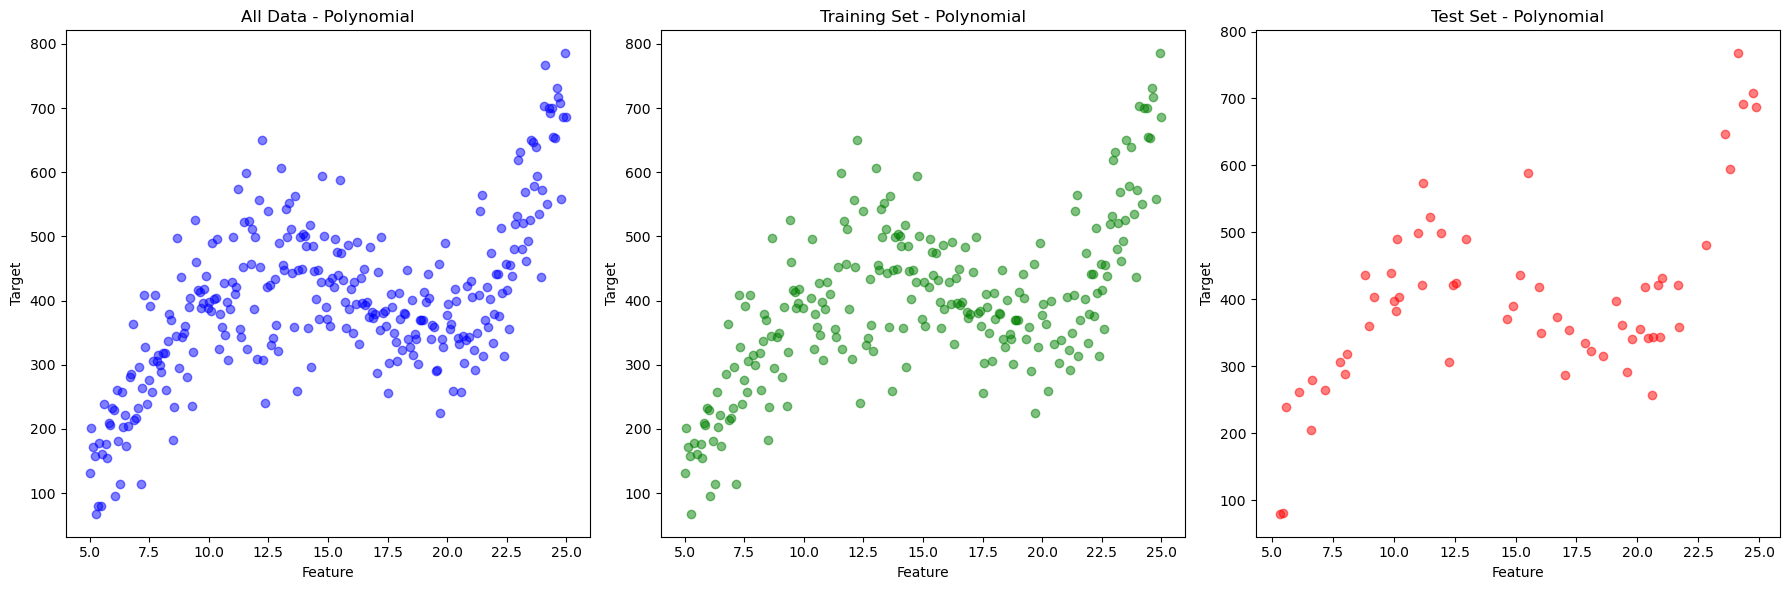

In [57]:
from sklearn.model_selection import train_test_split

poly_data = pd.read_csv('datasets/secret_polynomial.csv')

feature_poly = poly_data[['X']] # DataFrame of features
target_poly = poly_data['y'] # Series of target variable

# Split the data into training and testing sets
feature_train, feature_test, target_train, target_test = train_test_split(feature_poly, target_poly, test_size=0.2, random_state=42)

# Plotting
fig, poly_axes = plt.subplots(1, 3, figsize=(18, 6))

poly_axes[0].scatter(feature_poly, target_poly, color='blue', alpha=0.5)
poly_axes[0].set_title('All Data - Polynomial')
poly_axes[0].set_xlabel('Feature')
poly_axes[0].set_ylabel('Target')

poly_axes[1].scatter(feature_train, target_train, color='green', alpha=0.5)
poly_axes[1].set_title('Training Set - Polynomial')
poly_axes[1].set_xlabel('Feature')
poly_axes[1].set_ylabel('Target')

poly_axes[2].scatter(feature_test, target_test, color='red', alpha=0.5)
poly_axes[2].set_title('Test Set - Polynomial')
poly_axes[2].set_xlabel('Feature')
poly_axes[2].set_ylabel('Target')

plt.tight_layout()
plt.show()

2. Now fit and plot (e.g., using subplots) all polynomial models for degrees $d\in [1,6]$. Observe your figure and decide which degree gives the best fit. Motivate your answer.

The models with degrees 1 and 2 do not capture the curvature in the data very well. I think that this is a potential underfitting issue. Their curve misses the underlying pattern.  
Degrees 3, 4, and 5 follow the noise in the data too closely. Especially for the highest values of the features. And I think that this is a potential overfitting issue.  
But degree 6 appears to be a good fit as it matches the curvature of the data points, without overcomplicating the model.

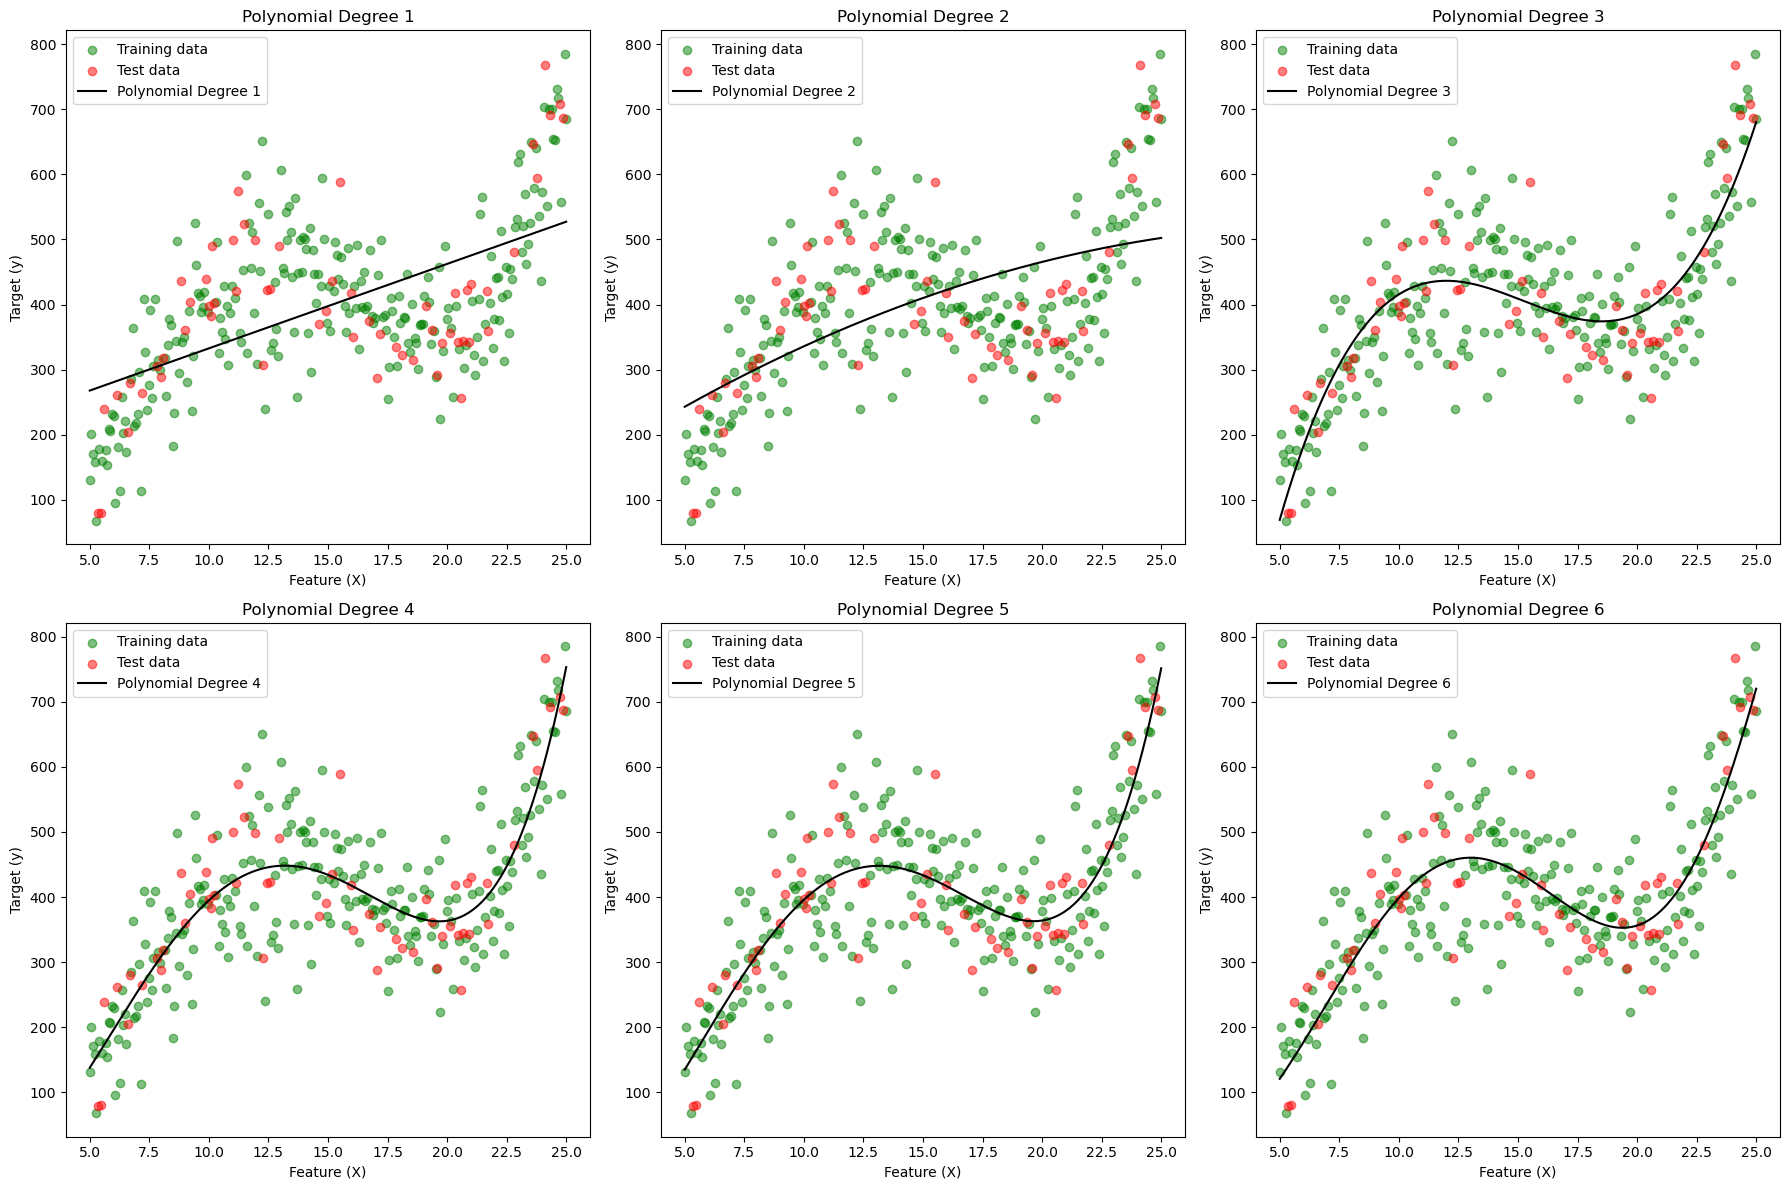

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_poly, target_poly, test_size=0.2, random_state=42)

# Setup plot for polynomial degrees from 1 to 6
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  
axes = axes.flatten()  

X_train = X_train.values
X_test = X_test.values
X_fit = np.linspace(feature_poly['X'].min(), feature_poly['X'].max(), 400).reshape(-1, 1)

for index, degree in enumerate(range(1, 7)):
    model = RegressionModelNormalEquation(degree)
    model.fit(X_train, y_train)  
    y_fit = model.predict(X_fit)

    # Plotting
    axes[index].scatter(X_train, y_train, color='green', alpha=0.5, label='Training data')
    axes[index].scatter(X_test, y_test, color='red', alpha=0.5, label='Test data')
    axes[index].plot(X_fit, y_fit, color='black', label=f'Polynomial Degree {degree}')
    axes[index].set_title(f'Polynomial Degree {degree}')
    axes[index].set_xlabel('Feature (X)')
    axes[index].set_ylabel('Target (y)')
    axes[index].legend()

plt.tight_layout()
plt.show()

3. To increase the confidence of your answer, you must divide the data into training and test sets and make repeated runs with shuffled data (at least 20 runs). You must decide on the best way to make this decision. By using this approach, what is your decision and why?  

I observed the results by increasing "n_runs" by ten, and I observed almost similar results in every way. I chose to stop at 100 because I observed that anything more would unnecessarily extend the running time of the code, and at numbers close to here, the code was already giving good results as expected.

In [59]:
n_runs = 100
max_degree = 6
errors = pd.DataFrame(np.zeros((n_runs, max_degree)), columns=[f'Degree {i}' for i in range(1, max_degree+1)])

for run in range(n_runs):
    # Split the data into training and testing sets
    feature_train, feature_test, target_train, target_test = train_test_split(
        feature_poly, target_poly, test_size=0.2, random_state=run)  

    for degree in range(1, max_degree + 1):
        model = RegressionModelNormalEquation(degree)
        model.fit(feature_train.values, target_train.values)
        # Evaluate on testing data
        test_error = model.evaluate(feature_test.values, target_test.values)  
        # Store the testing error
        errors.iloc[run, degree - 1] = test_error

# Calculate the average and standard deviation of testing errors for each degree
avg_errors = errors.mean()
std_errors = errors.std()

# The best degree is the one with the lowest average testing error
best_degree = avg_errors.idxmin()

print("Average testing errors for each degree:")
print(avg_errors)
print("\nStandard deviation of testing errors for each degree:")
print(std_errors)
print(f"\nBest polynomial degree based on the lowest average testing error: {best_degree}")

Average testing errors for each degree:
Degree 1    10890.841822
Degree 2    10966.651350
Degree 3     5345.155681
Degree 4     4872.748761
Degree 5     4867.859589
Degree 6     4859.701338
dtype: float64

Standard deviation of testing errors for each degree:
Degree 1    1754.239148
Degree 2    1854.419573
Degree 3     884.749893
Degree 4     896.868615
Degree 5     896.858049
Degree 6     888.964348
dtype: float64

Best polynomial degree based on the lowest average testing error: Degree 6


## Part 3

1. Read and normalize the data. Plot the 2 variables in the x and y-axis. Use different colors to plot the classes (i.e., 0 or 1). You should plot two series to obtain this figure.  

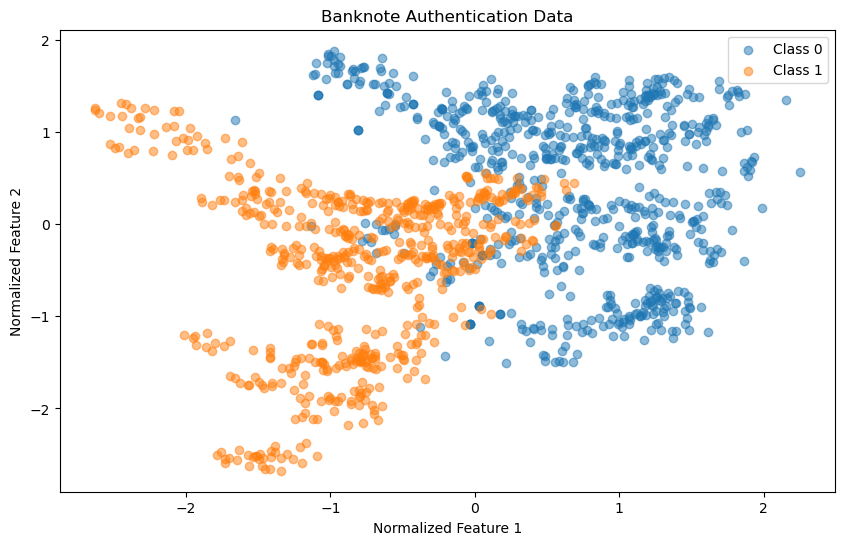

In [60]:
banknote_data = pd.read_csv('datasets/banknote_authentication.csv', header=None)

# Extract features and labels
features = banknote_data.iloc[:, :-1]
labels = banknote_data.iloc[:, -1]

# Normalize the features
bd_scaler = StandardScaler()
features_normalized = bd_scaler.fit_transform(features)

# Plotting
plt.figure(figsize=(10, 6))
for class_value in np.unique(labels):
    # Separate rows by class
    row_ix = np.where(labels == class_value)
    # Scatter plot for each class
    plt.scatter(features_normalized[row_ix, 0], features_normalized[row_ix, 1], label=f'Class {class_value}', alpha=0.5)
plt.title('Banknote Authentication Data')
plt.xlabel('Normalized Feature 1')
plt.ylabel('Normalized Feature 2')
plt.legend()
plt.show()


2.  Separate a validation set with 20\% of the data. We will call the remaining 80\% a sub-dataset.

In [61]:
features_subdataset, features_validation, labels_subdataset, labels_validation = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Print the shapes of the datasets to verify the split
print("Subdataset features shape:", features_subdataset.shape)
print("Subdataset labels shape:", labels_subdataset.shape)
print("Validation set features shape:", features_validation.shape)
print("Validation set labels shape:", labels_validation.shape)

Subdataset features shape: (1097, 2)
Subdataset labels shape: (1097,)
Validation set features shape: (275, 2)
Validation set labels shape: (275,)


3. Your task now is to decide on a learning rate and the number of iterations that would work well for your implementations of the LogisticRegression and your NonLinearLogisticRegression. The degree for the NonLinearLogisticRegression model must be 2. Create a figure for each model showing the learning rate and number of iterations and plot the cost function $J(\beta)$ as a function over iterations. This approach must use the sub-dataset (the 80\%) from step 2. Discuss your choice for an appropriate learning rate and the number of iterations.

The learning rate is like the size of the steps to be taken when walking down a staircase. Steps that are too big can overshoot the step and miss the target. Very small steps can take a long time to reach the goal. And the number of iterations is the number of steps we will take.  
I think a learning rate of 0.001 works best in this case. Because this learning rate shows a steady decrease in cost without the ridiculous fluctuations that are an indicator of missing the target i.e. overshooting.  
Increasing the number of iterations from 100 to 1000 constantly decreases the cost as I expect. But after a point, decreases become unnecessary. More than 1000 iterations will not improve the model, but will only extend the working time with unnecessary calculations.  
At least that was my observation here. So I think the point in this part is all about finding a proper balance. The whole point here is to find a learning rate for the model that allows for a smooth descent without overshooting, and a sufficient number of iterations that do not waste time.  



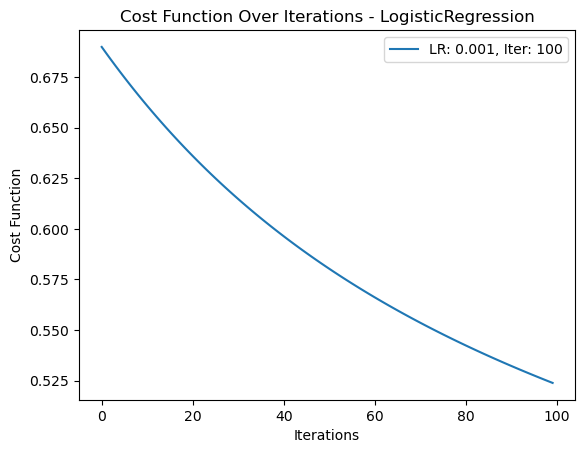

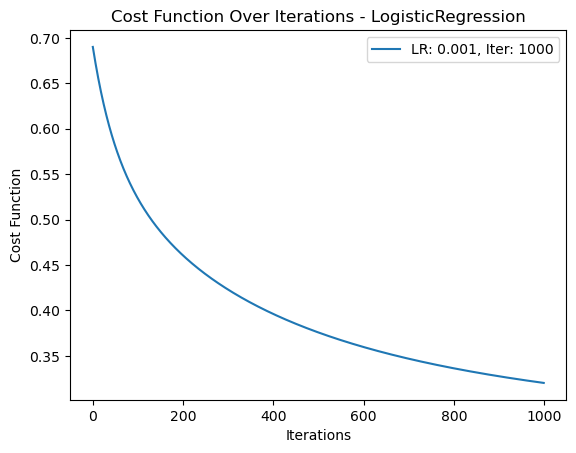

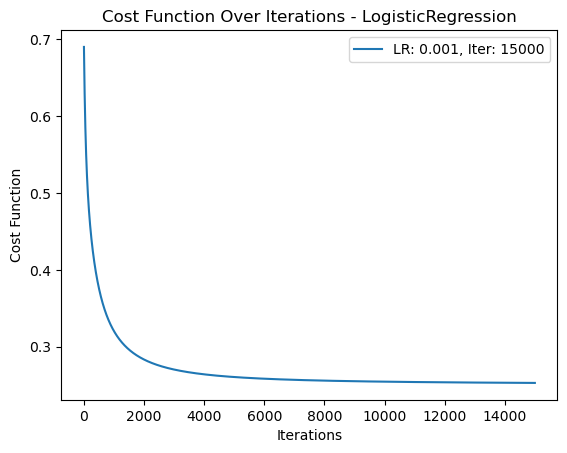

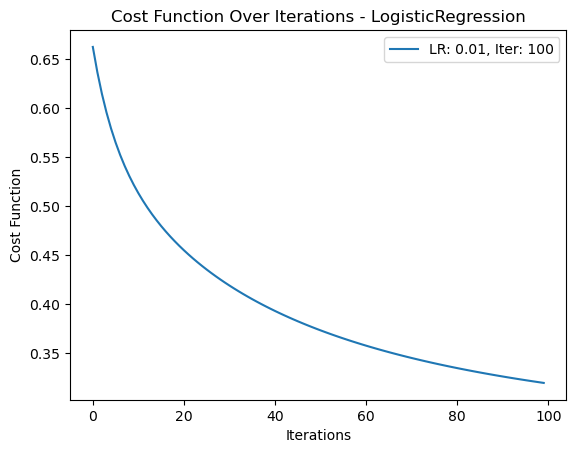

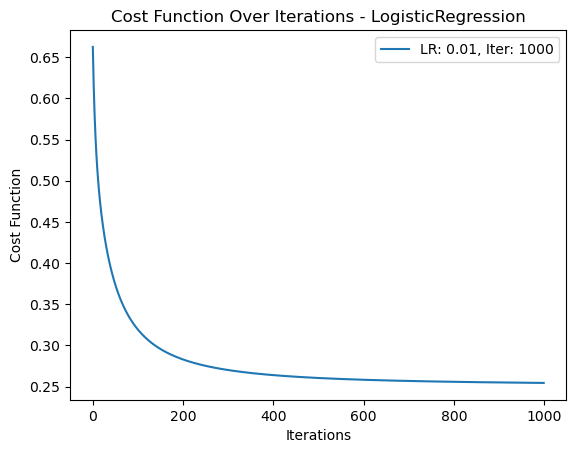

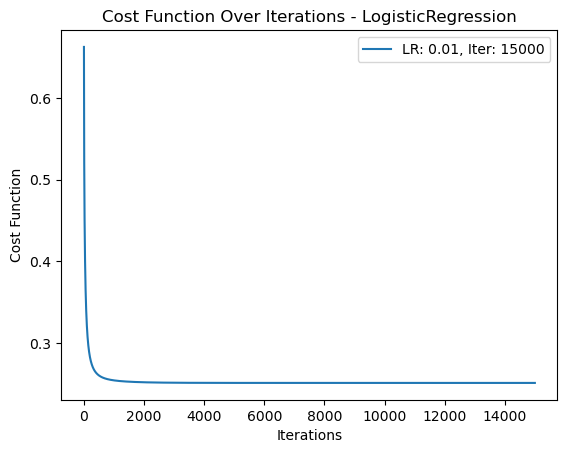

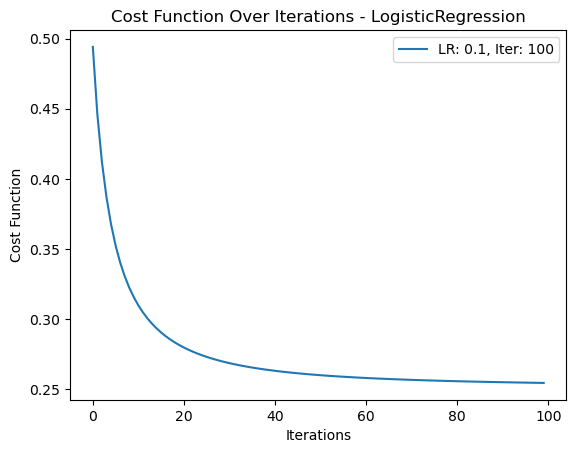

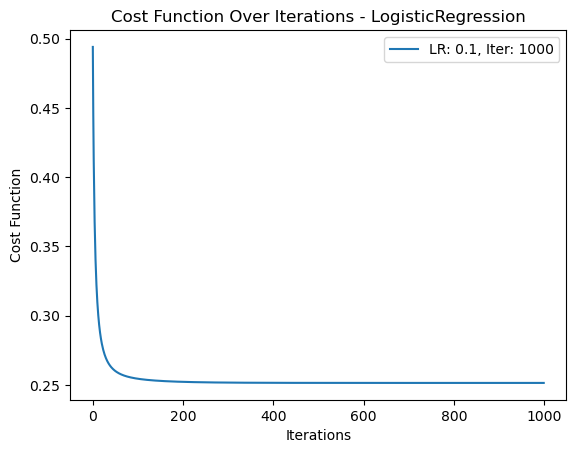

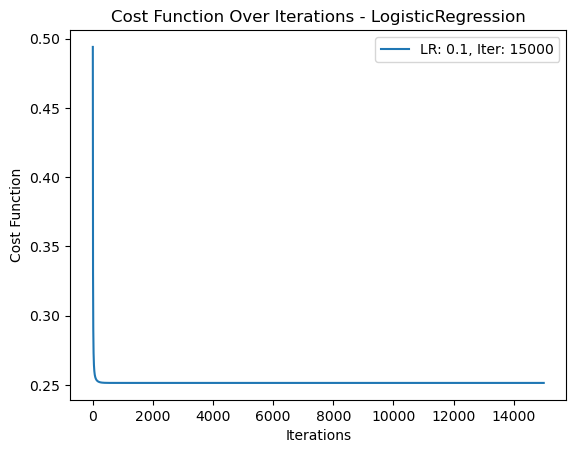

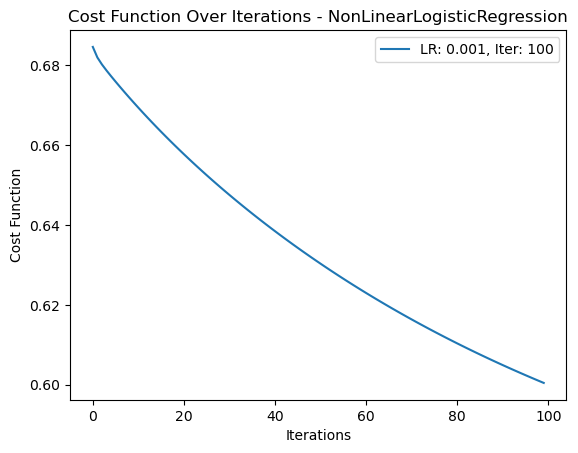

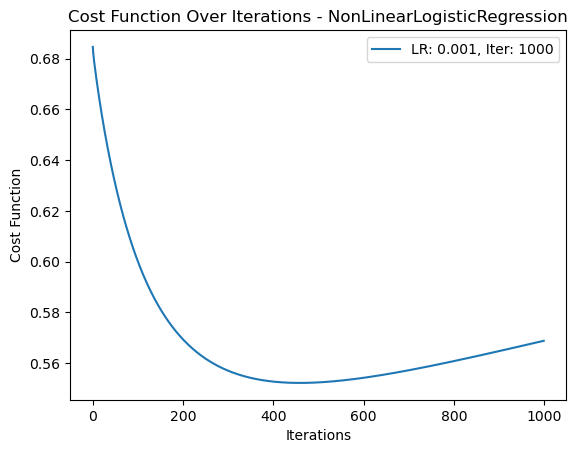

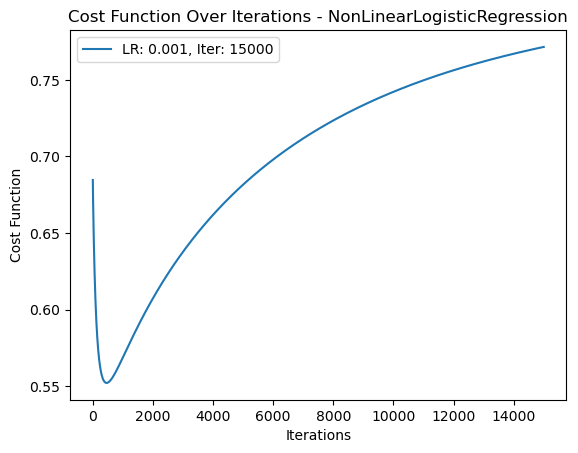

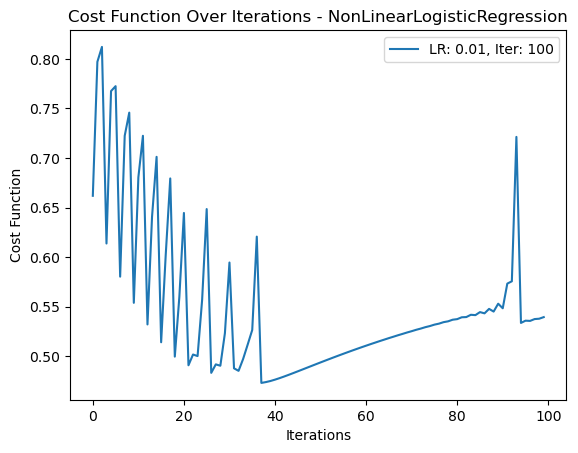

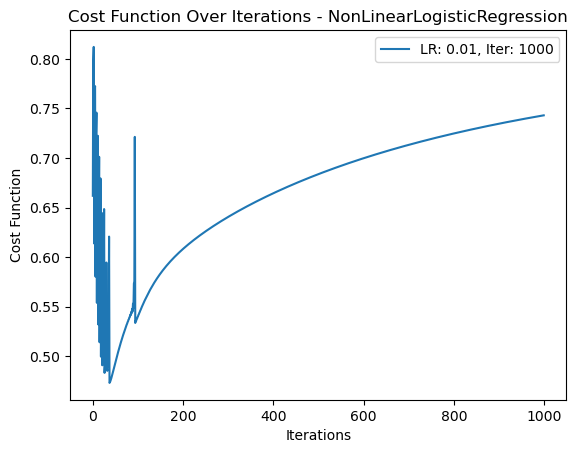

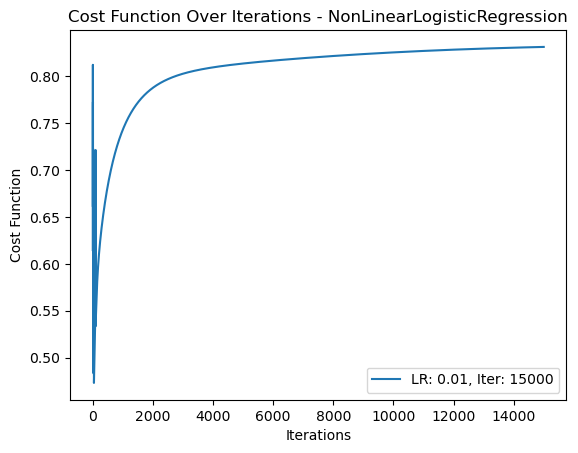

c:\Users\etkae\Desktop\Skola\MachineLearning\Assignment 2\ek223zf_A2\MachineLearningModel.py:189: RuntimeWarning: divide by zero encountered in log
  cost = -np.mean(y * logpre + (1 - y) * np.log(1 - predictions))
c:\Users\etkae\Desktop\Skola\MachineLearning\Assignment 2\ek223zf_A2\MachineLearningModel.py:189: RuntimeWarning: invalid value encountered in multiply
  cost = -np.mean(y * logpre + (1 - y) * np.log(1 - predictions))


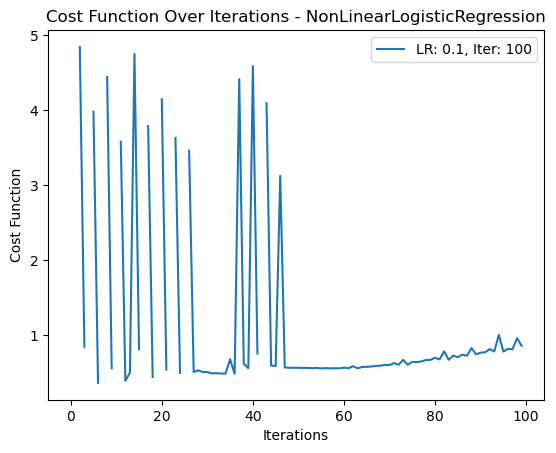

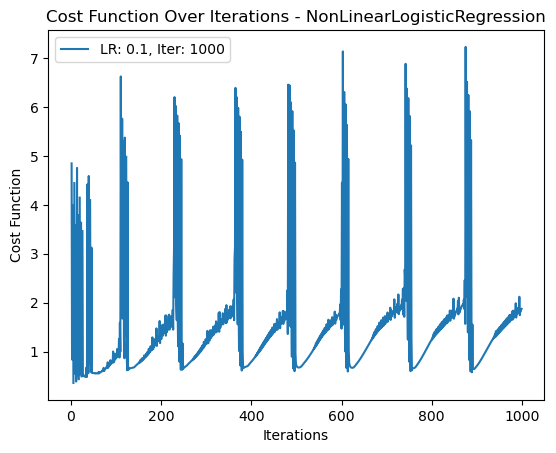

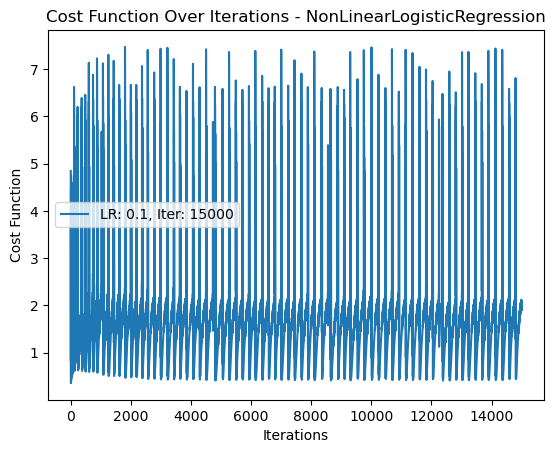

In [62]:
from MachineLearningModel import LogisticRegression, NonLinearLogisticRegression

def plot_cost_over_iterations(cost_history, learning_rate, num_iterations, model_name):
    plt.figure()
    plt.plot(range(len(cost_history)), cost_history, label=f'LR: {learning_rate}, Iter: {num_iterations}')
    plt.title(f'Cost Function Over Iterations - {model_name}')
    plt.xlabel('Iterations')
    plt.ylabel('Cost Function')
    plt.legend()
    plt.show()

features_subdataset = np.array(features_subdataset)
labels_subdataset = np.array(labels_subdataset)

learning_rates = [0.001, 0.01, 0.1]
num_iterations_options = [100, 1000, 15000]

# LogisticRegression Testing
for lr in learning_rates:
    for num_iter in num_iterations_options:
        model = LogisticRegression(learning_rate=lr, num_iterations=num_iter)
        model.fit(features_subdataset, labels_subdataset)
        plot_cost_over_iterations(model.cost_history, lr, num_iter, 'LogisticRegression')

# NonLinearLogisticRegression Testing
for lr in learning_rates:
    for num_iter in num_iterations_options:
        model = NonLinearLogisticRegression(degree=2, learning_rate=lr, num_iterations=num_iter)
        model.fit(features_subdataset, labels_subdataset)
        plot_cost_over_iterations(model.cost_history, lr, num_iter, 'NonLinearLogisticRegression')

5. Repeat 20 times your experiments (i.e., using different seeds) with the decided learning rate and the number of iterations (step 2) using 20 different sub-datasets generated by your method from step 4. Report as a box-plot all accuracies (i.e., percentage of correct classifications) reported by each model in these 20 runs. Compare and discuss the two models. Are they qualitatively the same? Why?

The images provided by my code shows that models do not have a similar range of accuracies. The logistic regression model has a tighter interquartile range and works better. It has an accuracy that is more consistent across different runs. The nonlinear logistic regression model is not like this and is much more sensitive to the data it is trained on. Additionally, unlike the logistic regression model, it has a wider spread. I think this may be because the nonlinear regression model probably overfits the data in a way that the logistic regression model does not. It may also be because it is more complex than the logistic regression model.

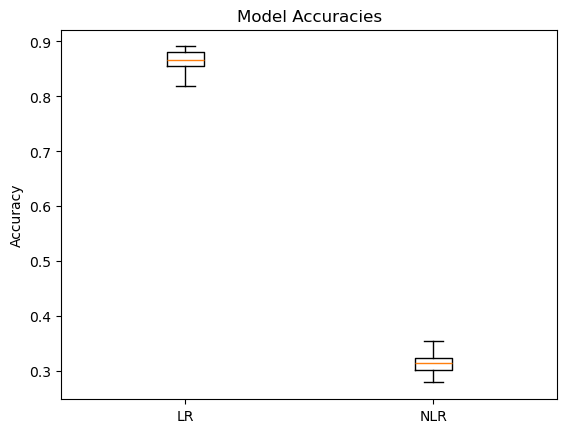

In [63]:
def create_sub_datasets(features, labels, splits=20):
    sub_datasets = []
    for _ in range(splits):
        X_train, X_test, y_train, y_test = train_test_split(
            features, labels, test_size=0.2
        )
        sub_datasets.append((X_train, X_test, y_train, y_test))
    return sub_datasets

def evaluate_models(sub_datasets, learning_rate, iterations):
    lr_accuracies = []
    nlr_accuracies = []

    for X_train, X_test, y_train, y_test in sub_datasets:
        if isinstance(X_train, pd.DataFrame):
            X_train = X_train.values
        if isinstance(X_test, pd.DataFrame):
            X_test = X_test.values
        if isinstance(y_train, pd.Series):
            y_train = y_train.values
        if isinstance(y_test, pd.Series):
            y_test = y_test.values

        # Logistic Regression Model
        lr_model = LogisticRegression(learning_rate=learning_rate, num_iterations=iterations)
        lr_model.fit(X_train, y_train)
        lr_accuracy = lr_model.evaluate(X_test, y_test)
        lr_accuracies.append(lr_accuracy)

        # Nonlinear Logistic Regression Model
        nlr_model = NonLinearLogisticRegression(degree=2, learning_rate=learning_rate, num_iterations=iterations)
        nlr_model.fit(X_train, y_train)
        nlr_accuracy = nlr_model.evaluate(X_test, y_test)
        nlr_accuracies.append(nlr_accuracy)

    return lr_accuracies, nlr_accuracies

sub_datasets = create_sub_datasets(features, labels, splits=20)
lr_accuracies, nlr_accuracies = evaluate_models(sub_datasets, learning_rate=0.001, iterations=1000)

# Boxplot
plt.boxplot([lr_accuracies, nlr_accuracies], labels=['LR', 'NLR'])
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.show()

6. Now plot the decision boundary using a similar code to the one provided in class. You must plot the decision boundaries for the normalized data, use both models (LinearLogisticRegression and NonLinearLogisticRegression) and your choice of hyperparameters (step 3), totaling two figures. You must fit your model on the subdataset, but plot the validation dataset only in the figure.  The models that were fit are the ones to be used to create the decision boundary. Report also the accuracies for the two models.  Discuss your results (e.g., similarities, differences, etc) for accuracy and the decision boundary plots.

The nonlinear logistic regression model performs slightly better than the linear model. I think the reason for this may be that the nonlinear model can handle more complex models. Decision boundaries in the charts in the images show how each model classifies the data. Linear model with straight line and nonlinear model with curved line. This difference in the shape of the decision boundaries can significantly affect the classification.

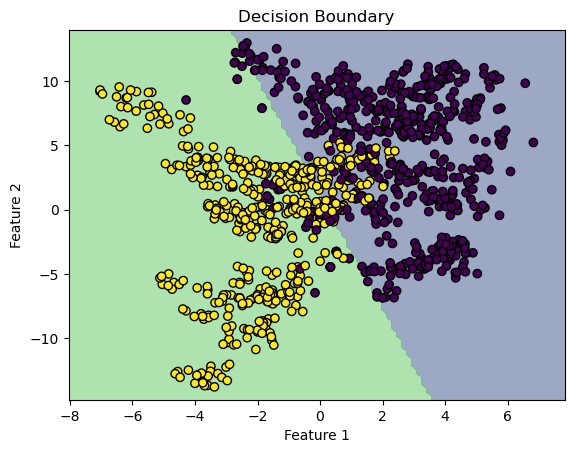

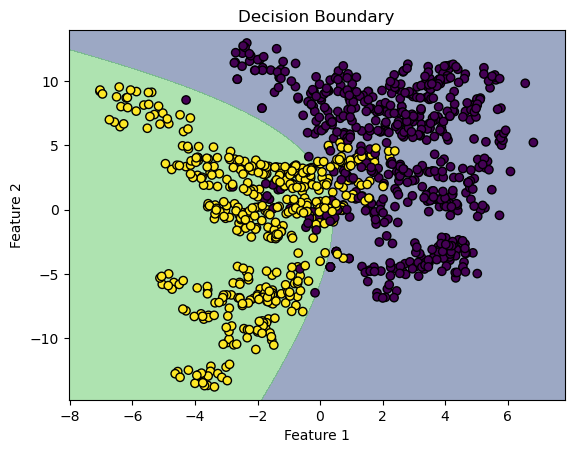

Linear Model Accuracy: 0.8872727272727273
Non-Linear Model Accuracy: 0.19120178706661328


In [64]:
from DecisionBoundary import plotDecisionBoundary

features_np = features.values if isinstance(features, pd.DataFrame) else features
labels_np = labels.values if isinstance(labels, pd.Series) else labels

X_train, X_test, y_train, y_test = train_test_split(features_np, labels_np, test_size=0.20)

# Initialize and fit models
lr_model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
lr_model.fit(X_train, y_train)

nlr_model = NonLinearLogisticRegression(degree=2, learning_rate=0.01, num_iterations=1000)
nlr_model.fit(X_train, y_train)

# Plot decision boundaries
plotDecisionBoundary(X_train[:, 0], X_train[:, 1], y_train, lr_model)
plotDecisionBoundary(X_train[:, 0], X_train[:, 1], y_train, nlr_model)

# Evaluate the models on the test set and print the accuracies
lr_accuracy = lr_model.evaluate(X_test, y_test)
nlr_accuracy = nlr_model.evaluate(X_test, y_test)

print(f'Linear Model Accuracy: {lr_accuracy}')
print(f'Non-Linear Model Accuracy: {nlr_accuracy}')


## Part 4

1. Start by normalizing the data and separating a validation set with 20\% of the data randomly selected. The remaining 80\% will be called the sub-dataset.

In [65]:
from ForwardSelection import ForwardSelection
from ROCAnalysis import ROCAnalysis

def normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

def create_split(seed, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=seed)
    return X_train, X_val, y_train, y_val

# Load data
hdc_data = np.genfromtxt('./datasets/heart_disease_cleveland.csv', delimiter=',', skip_header=1)
Xfeature = hdc_data[:, :-1]  
Ytarget = hdc_data[:, -1]   

# Normalize features
X_norm, mu, sigma = normalize(Xfeature)

seed = 42  
X_subdataset, X_validation, y_subdataset, y_validation = create_split(seed, X_norm, Ytarget)

# Initialize and use the ForwardSelection class
model = LogisticRegression()  
forward_selector = ForwardSelection(X_subdataset, y_subdataset, model)
forward_selector.fit()

predictions = forward_selector.predict(X_validation)

# Evaluate performance of the model
roc_analysis = ROCAnalysis(predictions, y_validation)
print("TP Rate:", roc_analysis.tp_rate())
print("FP Rate:", roc_analysis.fp_rate())
print("Precision:", roc_analysis.precision())
print("F-score:", roc_analysis.f_score())

TP Rate: 0.6842105263157895
FP Rate: 0.13043478260869565
Precision: 0.896551724137931
F-score: 0.7761194029850746


2. Use your implementation of forward selection to estimate a reasonable classification model. You must use your implementation of Logistic Regression in this assignment. The decision to make a reasonable number of iterations and learning rate is up to you but must be justified. Optimize the model selection to produce the best f-score. You must use the sub-dataset in your forward selection process. Report the features selected by this process and discuss your results. 

The output that I got from my code shows that the forward selection process identifies features 3, 8, and 11 as the most important predictors for the target variable. And the F-score of 0.776 in the validation set indicates a good balance between precision and recall. The reduced number of features means the model is simpler and faster, without a substantial loss in performance.

In [70]:
learning_rate = 0.01  
num_iterations = 1000  
logistic_model = LogisticRegression(learning_rate=learning_rate, num_iterations=num_iterations)
forward_selection = ForwardSelection(X_subdataset, y_subdataset, logistic_model)

forward_selection.forward_selection()
forward_selection.fit()
predictions = forward_selection.predict(X_validation)
roc_analysis = ROCAnalysis(predictions, y_validation)

# Calculate and report the F-score
f_score = roc_analysis.f_score()
print("Selected features:", forward_selection.selected_features)
print("F-score on validation set:", f_score)

Selected features: [11, 8, 3]
F-score on validation set: 0.7761194029850746


3. Report the performance of the best model in the validation set regarding all statistics available in your ROCAnalysis class. 
Was the process successful when compared to using all features?  
Discuss your results regarding these metrics and what you can conclude from this experiment.

My model shows a good balance between sensitivity which has TP-rate of 68.42% and precision of 89.65%. It indicates that it correctly identifies a majority of true positive cases while maintaining a high accuracy in these predictions. The false positive rate is 13.04%, which can be considered low. This shows that my model does not incorrectly classify many negative cases as positive. The F-score of 0.766 provides a good balance, as I wrote before.  
Thus, according to my observations, I can say that the model performs as expected with good sensitivity in distinguishing patients with and without heart disease.

In [67]:
# Evaluate the model using the validation set
predictions = forward_selection.predict(X_validation)
roc_analysis = ROCAnalysis(predictions, y_validation)

# Calculate the metrics
tp_rate = roc_analysis.tp_rate()
fp_rate = roc_analysis.fp_rate()
precision = roc_analysis.precision()
f_score = roc_analysis.f_score()

# Print the metrics
print(f"True Positive Rate (Sensitivity, Recall): {tp_rate}")
print(f"False Positive Rate: {fp_rate}")
print(f"Precision: {precision}")
print(f"F-score: {f_score}")

True Positive Rate (Sensitivity, Recall): 0.6842105263157895
False Positive Rate: 0.13043478260869565
Precision: 0.896551724137931
F-score: 0.7761194029850746
